In [84]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

In [85]:
# (1) Veri Seti İncelenmesi
cancer = load_breast_cancer()
df = pd.DataFrame(data = cancer.data, columns = cancer.feature_names)
df["target"] = cancer.target

In [86]:
# (2) Makine Öğrenmesi Modelinin Seçilmesi KNN Sınıflandırıcı
# (3) Modelin Train Edilmesi
X = cancer.data # features
y = cancer.target # target

In [87]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [88]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [95]:
knn = KNeighborsClassifier(n_neighbors=9) # Model olusturma komsu parametresini unutma******
knn.fit(x_train, y_train)# fit fonksiyonu verimizi (samples + target) kullanarak knn algoritmasi

KNeighborsClassifier(n_neighbors=9)

In [96]:
# (4) Sonuçların Değerlendirilmesi: test
y_pred = knn.predict(x_test)
accurary = accuracy_score(y_test,y_pred)
print("Doğruluk: " , accuary)

Doğruluk:  0.9532163742690059


In [97]:
conf_matrix = confusion_matrix(y_test,y_pred)
print("confusion_matrix: \n", conf_matrix)

confusion_matrix: 
 [[ 60   3]
 [  2 106]]


In [98]:
accuracy_values = []
k_values = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)
    k_values.append(k)


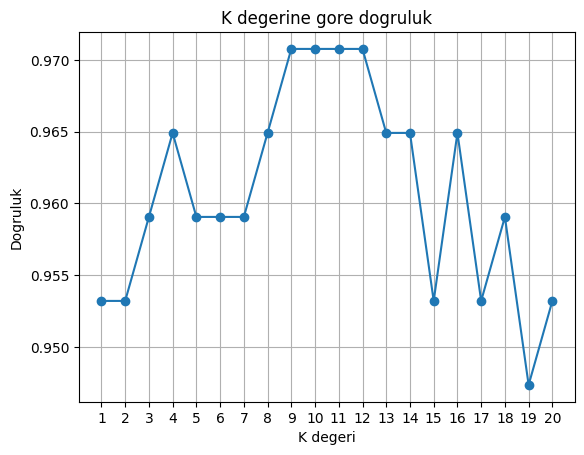

In [99]:
plt.figure()
plt.plot(k_values, accuracy_values, marker = "o", linestyle = "-")
plt.title("K degerine gore dogruluk")
plt.xlabel("K degeri")
plt.ylabel("Dogruluk")
plt.xticks(k_values)
plt.grid(True)